**Bank Term Deposit Subscription Prediction Using SVM**

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


**Loading data**

In [16]:
bank = pd.read_csv("bank-full.csv",sep=';')

In [17]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [18]:
bank.shape

(45211, 17)

**Data Pre-processing**

In [19]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


**Check for missing values**

In [20]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

**Encode categorical variables**

In [21]:
label_encoders = {}
for column in bank.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    bank[column] = le.fit_transform(bank[column])
    label_encoders[column] = le

In [22]:
print("\nData after encoding:")
print(bank.head())


Data after encoding:
   age  job  marital  education  default  balance  housing  loan  contact  \
0   58    4        1          2        0     2143        1     0        2   
1   44    9        2          1        0       29        1     0        2   
2   33    2        1          1        0        2        1     1        2   
3   47    1        1          3        0     1506        1     0        2   
4   33   11        2          3        0        1        0     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  y  
0    5      8       261         1     -1         0         3  0  
1    5      8       151         1     -1         0         3  0  
2    5      8        76         1     -1         0         3  0  
3    5      8        92         1     -1         0         3  0  
4    5      8       198         1     -1         0         3  0  


**Separate features (X) and target (y)**

In [23]:
X = bank.drop('y', axis=1)
y = bank['y']

**Split the dataset**

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Scale the features**

In [25]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Train the SVM Model**

In [26]:
# Train an SVM model
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

**Evaluate the Model**

In [27]:
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Confusion Matrix:
[[7799  153]
 [ 784  307]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7952
           1       0.67      0.28      0.40      1091

    accuracy                           0.90      9043
   macro avg       0.79      0.63      0.67      9043
weighted avg       0.88      0.90      0.88      9043


Accuracy Score:
0.8963839433816212


**Plot Confusion Matrix**

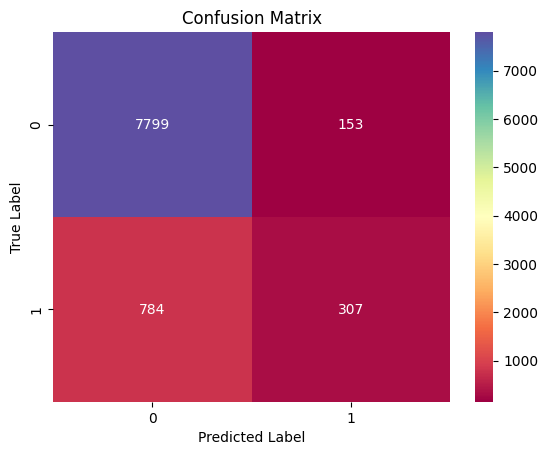

In [28]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Spectral')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


**Map numeric predictions back to "yes"/"no"**

In [29]:
y_pred_labels = ["yes" if pred == 1 else "no" for pred in y_pred]

In [33]:
print("\nFirst 40 Predictions (yes/no):")
print(y_pred_labels[:40])


First 40 Predictions (yes/no):
['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no']
